In [1]:
import sys
sys.path.append('../decision-trees/python/')

import decision_trees
import objective_functions
import utils

import code

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
N_BINS = 201
FIGSIZE = (16,8)

### Generate some random class distributions

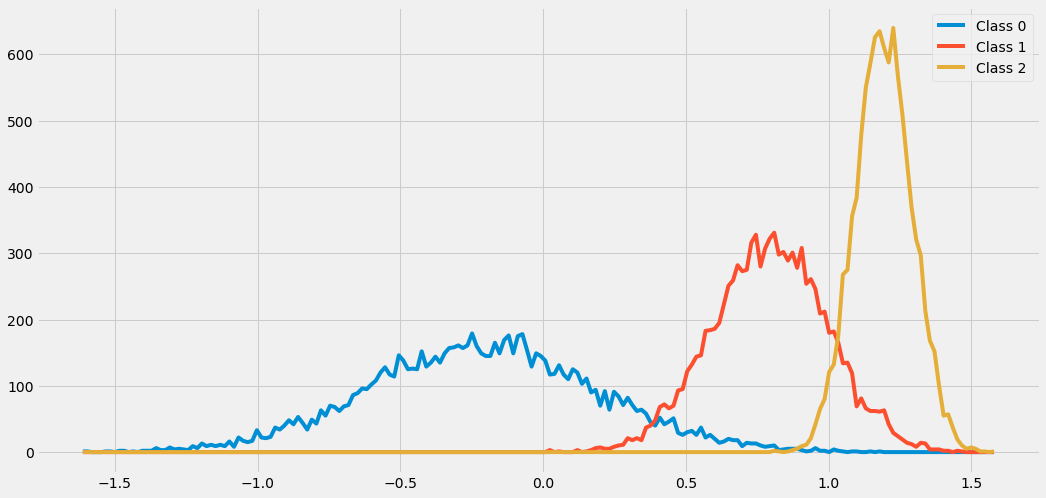

In [3]:
means  = [-0.2, 0.8, 1.2]
sigmas = [0.4, 0.2, 0.1]
points = [10000, 10000, 10000]

X = []
for mean, sigma, n in zip(means, sigmas, points):
    X.append(np.random.normal(mean, sigma, n))

BINS = np.linspace(np.concatenate(X).min(), np.concatenate(X).max(), N_BINS)
    
fig, ax = plt.subplots(figsize=FIGSIZE)
for i, x in enumerate(X):
    hist, bin_edges = np.histogram(x, bins=BINS)
    plt.plot(bin_edges[:-1], hist, label=f"Class {i}")
plt.legend()

### Make this into a two class problem

In [4]:
x_1 = X[1]
x_0 = np.concatenate((X[0], X[2]))

x = np.concatenate((x_0, x_1))
y = np.concatenate((np.zeros(x_0.shape), np.ones(x_1.shape)))

Text(0, 0.5, 'Instances in bucket')

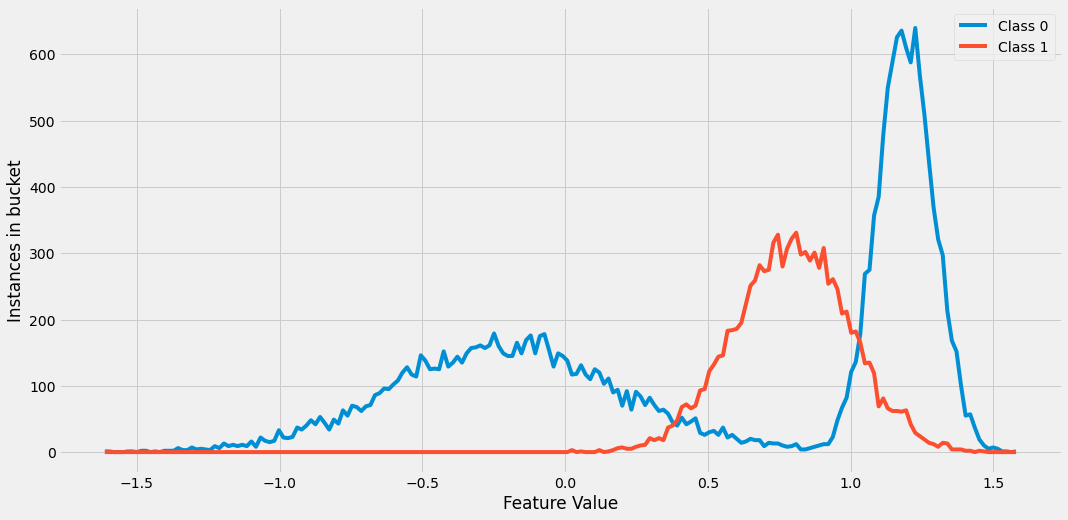

In [5]:
fig, ax = plt.subplots(figsize=(FIGSIZE))
for class_ in sorted(set(y)):
    hist, bin_edges = np.histogram(x[y == class_], bins=BINS)
    plt.plot(bin_edges[:-1], hist, label=f"Class {class_:.0f}")
plt.legend()
ax.set_xlabel('Feature Value')
ax.set_ylabel('Instances in bucket')

In [6]:
splits_boundary = np.linspace(min(x), max(x), 10)
splits_gini = [objective_functions.gini_impurity_split(x, y, boundary) for boundary in splits_boundary]

ValueError: x and y must have same first dimension, but have shapes (301,) and (10,)

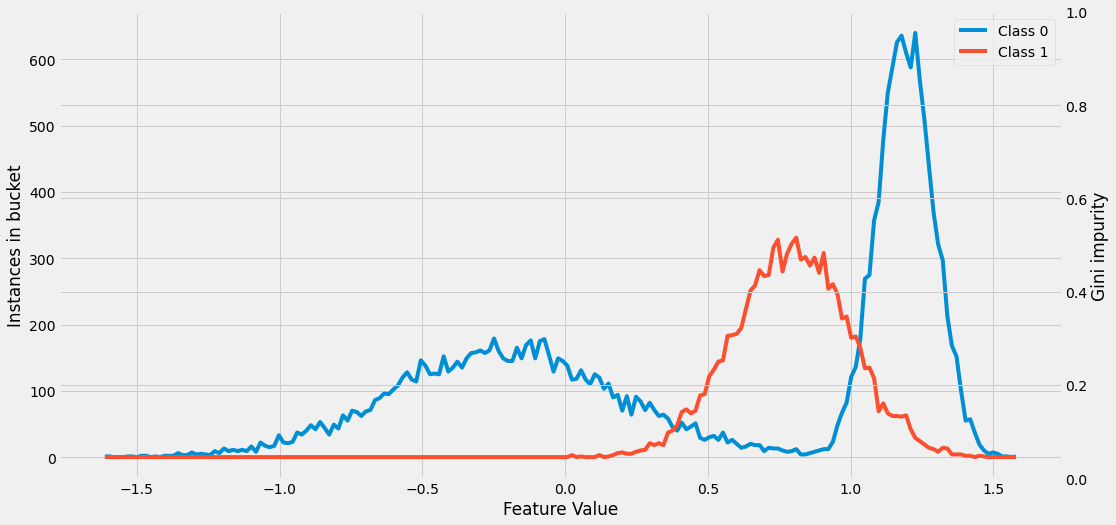

In [7]:
fig, ax1 = plt.subplots(figsize=(FIGSIZE))
ax2 = ax1.twinx()
for class_ in sorted(set(y)):
    hist, bin_edges = np.histogram(x[y == class_], bins=BINS)
    ax1.plot(bin_edges[:-1], hist, label=f"Class {class_:.0f}")
    
ax1.legend()
ax1.set_xlabel('Feature Value')
ax1.set_ylabel('Instances in bucket')

splits_bondary = np.linspace(min(x), max(x), 301)
splits_gini = [objective_functions.gini_impurity_split(x, y, boundary) for boundary in splits_boundary]
ax2.set_ylim(0, 1)
ax2.set_ylabel("Gini impurity")
ax2.plot(splits_boundary, splits_gini, color='green', label='Gini for split')
ax2.legend()